Preprocessing

co2:  https://gml.noaa.gov/ccgg/trends/data.html
energy: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?select=energy_dataset.csv

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller


Cleaning

In [54]:
co2_df=pd.read_csv("co2_daily_mlo.csv")
co2_df.head()

,yr,mon,day,decimal,CO2 molfrac (ppm)
0,1974,5,19,1974.3781,333.46
1,1974,5,20,1974.3808,333.64
2,1974,5,21,1974.3836,333.50
3,1974,5,22,1974.3863,333.21
4,1974,5,23,1974.3890,333.05


In [55]:
co2_df.isnull().sum()

yr                   0
mon                  0
day                  0
decimal              0
CO2 molfrac (ppm)    0
dtype: int64

In [56]:
# converting 'yr', 'mon', and 'day' into a dictionary
date_cols = {
    'year': co2_df['yr'],
    'month': co2_df['mon'],
    'day': co2_df['day']
}


In [57]:
# converting to single col
co2_df['date'] = pd.to_datetime(date_cols)

In [58]:
#dropping unnessacrry cols
co2_df.drop(columns=['yr','mon','day'],inplace=True)

#using date as index and sorting
co2_df.set_index('date',inplace=True)
co2_df.sort_index(inplace=True)

In [59]:
co2_df.drop(columns=['decimal'],inplace=True)

Normalising

In [60]:
# Normalising 
scaler = MinMaxScaler()
co2_df['co2_normalized'] = scaler.fit_transform(co2_df[['CO2 molfrac (ppm)']])
co2_df.head()

,CO2 molfrac (ppm),co2_normalized
date,,
1974-05-19,333.46,0.072174
1974-05-20,333.64,0.073930
1974-05-21,333.50,0.072564
1974-05-22,333.21,0.069736
1974-05-23,333.05,0.068175


Stationarization

In [61]:
# function to check if stationary: 
def is_stationary(col):
    # Drop missing and infinite values
    col_cleaned = col.replace([np.inf, -np.inf], np.nan).dropna()

    result = adfuller(col_cleaned)

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

In [62]:
is_stationary(co2_df['co2_normalized'])

ADF Statistic: -0.8768372753416949
p-value: 0.7955045128096212


Data isnt stationary so i will perform diff function

In [63]:
co2_df['CO2_diff'] = co2_df['CO2 molfrac (ppm)'].diff()

In [64]:
is_stationary(co2_df['CO2_diff'])

ADF Statistic: -12.188875375575533
p-value: 1.2995568222946043e-22


AGAIN

In [65]:
co2_df['CO2_diff_2nd'] = co2_df['CO2 molfrac (ppm)'].diff().diff()
is_stationary(co2_df['CO2_diff_2nd'])

ADF Statistic: -33.95115724789159
p-value: 0.0


as we can see data has become stationary and is ready for modeling

In [67]:
co2_df.head()

,CO2 molfrac (ppm),co2_normalized,CO2_diff,CO2_diff_2nd
date,,,,
1974-05-19,333.46,0.072174,NaN,NaN
1974-05-20,333.64,0.073930,0.18,NaN
1974-05-21,333.50,0.072564,-0.14,-0.32
1974-05-22,333.21,0.069736,-0.29,-0.15
1974-05-23,333.05,0.068175,-0.16,0.13


In [68]:
energy_df=pd.read_csv("energy_dataset.csv")
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [75]:
energy_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [77]:
# selecting useful columns 
consumption_df=energy_df[['time','total load actual','price actual']]

In [78]:
consumption_df['time']=pd.to_datetime(consumption_df['time'])

C:\Users\siddi\AppData\Local\Temp\ipykernel_18820\332693258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_df['time']=pd.to_datetime(consumption_df['time'])


In [79]:
consumption_df.set_index(['time'])

,total load actual,price actual
time,,
2015-01-01 00:00:00+01:00,25385.0,65.41
2015-01-01 01:00:00+01:00,24382.0,64.92
2015-01-01 02:00:00+01:00,22734.0,64.48
2015-01-01 03:00:00+01:00,21286.0,59.32
2015-01-01 04:00:00+01:00,20264.0,56.04
...,...,...
2018-12-31 19:00:00+01:00,30653.0,77.02
2018-12-31 20:00:00+01:00,29735.0,76.16
2018-12-31 21:00:00+01:00,28071.0,74.30


In [82]:
consumption_df.isnull().sum()

time                  0
total load actual    36
price actual          0
dtype: int64

Observinf null values and then filling them using forward filling

In [83]:
missing_rows = consumption_df[consumption_df.isnull().any(axis=1)]
print(missing_rows)

                            time  total load actual  price actual
108    2015-01-05 12:00:00+01:00                NaN         79.14
109    2015-01-05 13:00:00+01:00                NaN         73.95
110    2015-01-05 14:00:00+01:00                NaN         71.93
111    2015-01-05 15:00:00+01:00                NaN         71.50
112    2015-01-05 16:00:00+01:00                NaN         71.85
113    2015-01-05 17:00:00+01:00                NaN         80.53
661    2015-01-28 13:00:00+01:00                NaN         77.62
751    2015-02-01 07:00:00+01:00                NaN         16.98
752    2015-02-01 08:00:00+01:00                NaN         19.56
753    2015-02-01 09:00:00+01:00                NaN         23.13
756    2015-02-01 12:00:00+01:00                NaN         22.51
757    2015-02-01 13:00:00+01:00                NaN         23.44
758    2015-02-01 14:00:00+01:00                NaN         24.10
759    2015-02-01 15:00:00+01:00                NaN         21.12
760    201

In [84]:
consumption_df['total load actual'].fillna(method='ffill', inplace=True)

C:\Users\siddi\AppData\Local\Temp\ipykernel_18820\3469264664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_df['total load actual'].fillna(method='ffill', inplace=True)


In [85]:
consumption_df.isnull().sum()

time                 0
total load actual    0
price actual         0
dtype: int64

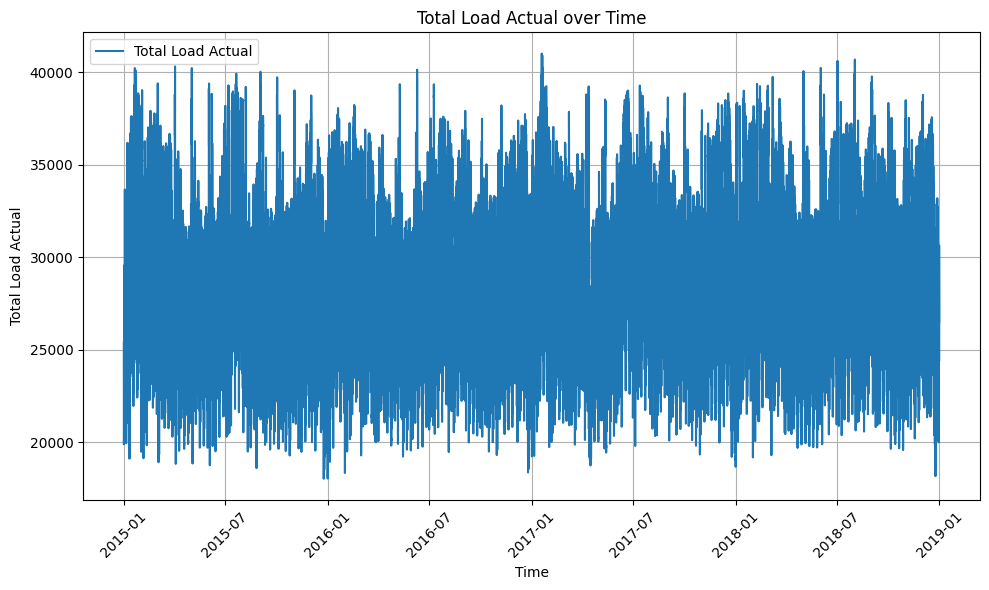

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(newdf['time'], newdf['total load actual'], label='Total Load Actual')
plt.xlabel('Time')
plt.ylabel('Total Load Actual')
plt.title('Total Load Actual over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Normalising 

In [96]:
X = consumption_df['total load actual'].values.reshape(-1, 1)
consumption_df['norm_load']=scaler.fit_transform(X)

C:\Users\siddi\AppData\Local\Temp\ipykernel_18820\2593722990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_df['norm_load']=scaler.fit_transform(X)


In [98]:
is_stationary(consumption_df['total load actual'])

ADF Statistic: -21.441580739351274
p-value: 0.0


It appears data already stationary, so no need to diff